<a href="https://colab.research.google.com/github/OttoBara/OnlineRetailAnalysis/blob/main/ProyectoDS_ParteI_Baratto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis del Dataset Online Retail**

## **Introducción**

El presente análisis se basa en el dataset **"Online Retail"**, que registra las transacciones de una tienda online realizadas entre diciembre de 2010 y diciembre de 2011. Este conjunto de datos proporciona información detallada de las operaciones comerciales, lo que permite una comprensión integral de los patrones de compra y del comportamiento del cliente. Los datos incluyen:

- **Número de factura** (`InvoiceNo`): Identificador único para cada transacción.
- **Código y descripción del producto** (`StockCode` y `Description`): Detalles sobre los artículos vendidos.
- **Cantidad de productos comprados** (`Quantity`): Volumen de artículos por transacción.
- **Precio unitario de los productos** (`UnitPrice`): Costo individual por artículo.
- **Identificación del cliente** (`CustomerID`) y país de origen (`Country`).
- **Fecha y hora de las transacciones** (`InvoiceDate`): Información temporal de las operaciones.

El objetivo principal de este análisis es identificar patrones clave en las compras, evaluar el desempeño de los productos, analizar tendencias por país y segmento de clientes, y proporcionar insights para la toma de decisiones estratégicas en áreas como marketing, inventarios y fidelización de clientes.

---

## **Objetivos específicos**
1. **Identificar patrones de ventas por producto:** Determinar cuáles son los artículos más populares y cuáles generan mayores ingresos.
2. **Explorar la distribución de ventas por país:** Analizar los principales mercados y su contribución relativa a los ingresos.
3. **Detectar patrones temporales:** Examinar la estacionalidad y los ciclos de compra según días, semanas o meses.
4. **Segmentar a los clientes según su impacto:** Clasificar a los compradores como "Recurrentes" o "Nuevos" para evaluar su contribución a los ingresos.

---

## **Preguntas de análisis**
1. ¿Qué productos destacan por su popularidad y cuáles son los más rentables?
2. ¿Qué países generan el mayor porcentaje de ingresos totales?
3. ¿Existen períodos específicos (semanas, meses) en los que las compras se concentren significativamente?
4. ¿Qué proporción de los ingresos proviene de los clientes más activos?
5. ¿Qué patrones recurrentes se observan en el comportamiento de los clientes a lo largo del tiempo?

---

## **Hipótesis iniciales**
1. **El Reino Unido es el mercado principal:** La mayoría de los ingresos provienen de clientes en este país.
2. **Impacto estacional:** Las compras tienden a aumentar significativamente en diciembre debido a las festividades.
3. **Principio de Pareto (80/20):** Una pequeña fracción de productos genera la mayor parte de los ingresos.
4. **Clientes recurrentes:** Estos clientes tienen un impacto considerablemente mayor en los ingresos que los nuevos compradores.

---

### **Metodología**
1. **Preparación del entorno:** Configuración de librerías y herramientas necesarias.
2. **Carga y exploración de datos:** Comprensión inicial de las características y limitaciones del dataset.
3. **Limpieza y preprocesamiento:** Eliminación de datos faltantes, duplicados y valores anómalos.
4. **Creación de columnas adicionales:** Enriquecer los datos para facilitar el análisis.
5. **Análisis exploratorio:** Identificar patrones clave y realizar una descripción inicial de los datos.
6. **Visualización avanzada:** Crear gráficos que respondan a las preguntas de análisis y validen las hipótesis.
7. **Conclusiones:** Presentar hallazgos clave que aporten valor estratégico.


### Fuente del Dataset

El dataset utilizado en este análisis fue obtenido de (https://www.kaggle.com/datasets/ulrikthygepedersen/online-retail-dataset), un repositorio de datasets públicos ampliamente reconocido. El conjunto de datos, titulado **"Online Retail Dataset"**, contiene información detallada de transacciones realizadas por una tienda online entre diciembre de 2010 y diciembre de 2011.

Esta fuente se seleccionó por su calidad y relevancia para analizar patrones de comportamiento de los clientes en un entorno de ventas online.


### **Descripción del dataset y público objetivo**

#### Descripción del dataset:
El dataset utilizado en este análisis, denominado **"Online Retail Dataset"**, contiene datos de transacciones realizadas por una tienda minorista online entre diciembre de 2010 y diciembre de 2011. Cada registro representa una transacción y contiene las siguientes columnas:

- **InvoiceNo**: Identificador único de cada transacción.
- **StockCode**: Código único del producto.
- **Description**: Descripción del producto.
- **Quantity**: Cantidad de unidades compradas.
- **InvoiceDate**: Fecha y hora de la transacción.
- **UnitPrice**: Precio unitario del producto (en libras esterlinas).
- **CustomerID**: Identificador único del cliente.
- **Country**: País del cliente.

Este dataset es ideal para analizar patrones de compra, comportamientos de los clientes y tendencias de ventas.

#### Público objetivo:
Este análisis está diseñado para servir a varios públicos interesados en mejorar el rendimiento de la tienda online:

1. **Equipos de marketing:**
   - Identificar segmentos de clientes más rentables.
   - Diseñar campañas personalizadas basadas en patrones de compra.

2. **Gestores de inventarios:**
   - Analizar la demanda de productos para optimizar la gestión de stock.
   - Detectar productos más y menos populares.

3. **Analistas de negocios:**
   - Estudiar patrones estacionales y tendencias de ventas.
   - Realizar proyecciones de ingresos basadas en datos históricos.

4. **Tomadores de decisiones estratégicas:**
   - Identificar mercados con alto potencial de crecimiento.
   - Priorizar estrategias enfocadas en clientes recurrentes.


In [ ]:
# Importar librerías principales
import pandas as pd  # Manipulación y análisis de datos
import numpy as np  # Cálculos numéricos
import matplotlib.pyplot as plt  # Gráficos básicos
import seaborn as sns  # Gráficos avanzados y estéticos

# Manejo de fechas
from datetime import datetime

# Manejo de archivos ZIP
import zipfile
import os

# Configuración opcional para gráficos
sns.set(style="whitegrid")  # Estilo visual de gráficos
print("Librerías importadas correctamente.")

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Ruta del archivo ZIP
zip_path = '/content/drive/MyDrive/DataSets de DataSience 1/Dataset 1 Online Retail.zip'
extract_to = '/content/dataset_1'

# Verificar que el archivo ZIP exista
if os.path.exists(zip_path):
    # Descomprimir el archivo ZIP
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Archivo descomprimido en: {extract_to}")
else:
    print(f"El archivo no se encuentra en la ruta: {zip_path}")

# Ruta al archivo CSV descomprimido
csv_path = os.path.join(extract_to, 'online_retail.csv')

# Cargar el archivo CSV en un DataFrame
try:
    # Si hay problemas con líneas corruptas, se ignoran utilizando `on_bad_lines='skip'`
    data = pd.read_csv(csv_path, encoding='latin1', on_bad_lines='skip')
    print("Dataset cargado correctamente.")

    # Exploración inicial del dataset
    print("Primeras filas del dataset:")
    print(data.head())

    print("\nInformación general del dataset:")
    print(data.info())

    print("\nDescripción estadística de las columnas numéricas:")
    print(data.describe())

except FileNotFoundError:
    print(f"El archivo CSV no fue encontrado en la ruta: {csv_path}")
except Exception as e:
    print(f"Error al cargar el dataset: {e}")


Librerías importadas correctamente.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archivo descomprimido en: /content/dataset_1
Dataset cargado correctamente.
Primeras filas del dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     1785

In [ ]:
# 1. Eliminar duplicados
print("Número de filas antes de eliminar duplicados:", data.shape[0])
data = data.drop_duplicates()
print("Número de filas después de eliminar duplicados:", data.shape[0])

# 2. Revisar valores nulos
print("\nValores nulos por columna antes de limpiar:")
print(data.isnull().sum())

# Tratar valores nulos:
# Eliminar filas donde `CustomerID` sea nulo (son necesarias para identificar al cliente)
data = data.dropna(subset=['CustomerID'])

# Rellenar nulos en la columna `Description` con "Sin descripción"
data['Description'] = data['Description'].fillna('Sin descripción')

print("\nValores nulos por columna después de limpiar:")
print(data.isnull().sum())

# 3. Filtrar valores negativos
print("\nFilas con valores negativos en 'Quantity' o 'UnitPrice':")
negatives = data[(data['Quantity'] < 0) | (data['UnitPrice'] < 0)]
print(negatives)

# Eliminar registros con valores negativos
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]
print("Número de filas después de eliminar valores negativos:", data.shape[0])

# 4. Crear columna `TotalPrice`
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Resumen después de la limpieza
print("\nResumen después de la limpieza:")
print(data.info())
print("\nDescripción estadística:")
print(data.describe())


Número de filas antes de eliminar duplicados: 541909
Número de filas después de eliminar duplicados: 536641

Valores nulos por columna antes de limpiar:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

Valores nulos por columna después de limpiar:


<ipython-input-57-ae0207f62941>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-57-ae0207f62941>:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Filas con valores negativos en 'Quantity' o 'UnitPrice':
       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT

### Preparación para el análisis exploratorio inicial

En esta etapa, comenzaremos a preparar el dataset para un análisis más profundo. Esto incluye la creación de nuevas columnas derivadas de las existentes, que nos permitirán identificar patrones temporales y clasificar la información de manera más efectiva.

Específicamente, vamos a:
1. Convertir la columna `InvoiceDate` en un formato de fecha y hora.
2. Extraer información útil de las fechas, como el año, el mes y el día de la semana.
3. Crear columnas adicionales que puedan facilitar futuros análisis, como si la transacción ocurrió en un fin de semana.

Estas nuevas columnas nos permitirán abordar preguntas relacionadas con la temporalidad de las transacciones y detectar tendencias estacionales en las ventas.



Cantidad de registros por país:
Country
United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         5

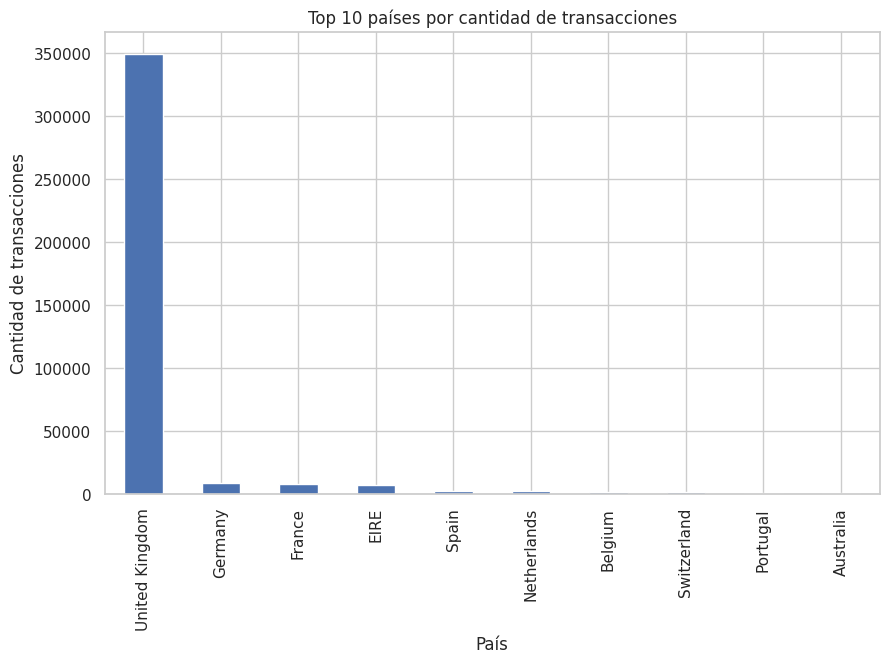

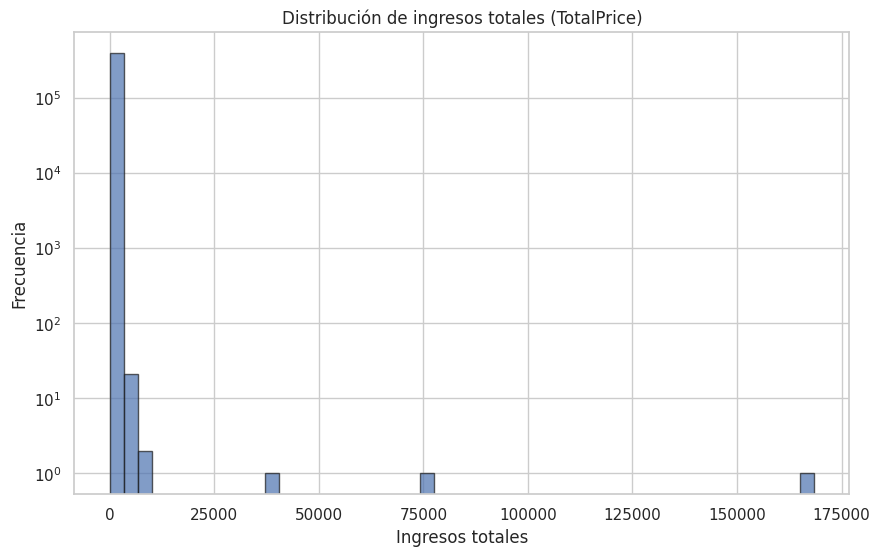

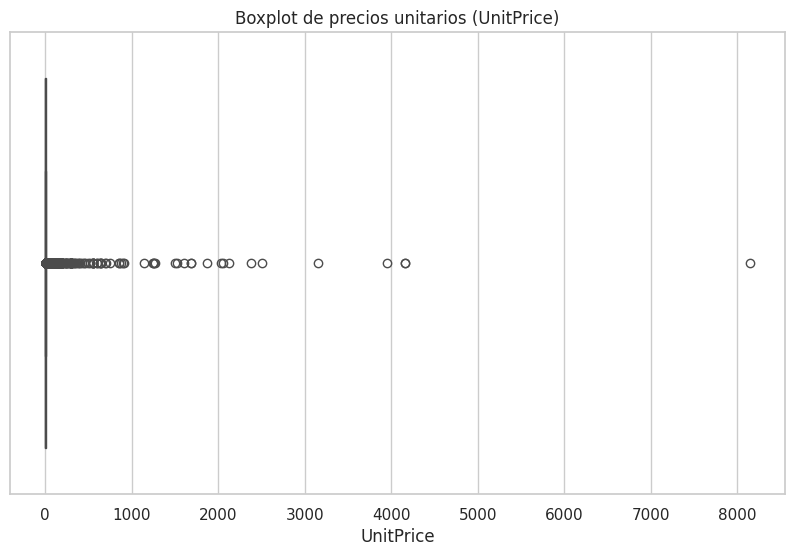

In [ ]:
# Crear nuevas columnas basadas en la fecha
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])  # Asegurar formato datetime
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()
data['Hour'] = data['InvoiceDate'].dt.hour

# Resumen de registros por país
print("\nCantidad de registros por país:")
print(data['Country'].value_counts())

# Gráfico de barras de transacciones por país (top 10)
top_countries = data['Country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar')
plt.title("Top 10 países por cantidad de transacciones")
plt.xlabel("País")
plt.ylabel("Cantidad de transacciones")
plt.show()

# Histograma de `TotalPrice`
plt.figure(figsize=(10, 6))
plt.hist(data['TotalPrice'], bins=50, edgecolor='k', alpha=0.7)
plt.title("Distribución de ingresos totales (TotalPrice)")
plt.xlabel("Ingresos totales")
plt.ylabel("Frecuencia")
plt.yscale('log')  # Escala logarítmica para mejor visualización
plt.show()

# Boxplot de `UnitPrice`
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['UnitPrice'])
plt.title("Boxplot de precios unitarios (UnitPrice)")
plt.show()


# Análisis preliminar del dataset

Durante la exploración inicial del dataset, se observaron los siguientes patrones y características:

## Distribución por país:
- La mayoría de las transacciones provienen del Reino Unido, con 349,208 registros, lo que representa más del 80% del total. Esto confirma la hipótesis inicial de que este país es el mercado principal de la tienda.
- Los siguientes países con más transacciones son Alemania, Francia e Irlanda, pero con cantidades significativamente menores.

## Ingresos totales por transacción:
- Se observó que la mayoría de los ingresos totales por transacción están concentrados en rangos bajos. Este patrón puede deberse a la venta de productos de bajo costo y/o pequeñas cantidades por compra.
- Existen algunas transacciones atípicas con ingresos extremadamente altos que merecen un análisis más detallado.

## Precios unitarios:
- La mayoría de los productos tienen precios unitarios bajos, pero existen valores atípicos, con precios superiores a 8,000 unidades monetarias. Esto puede indicar productos premium o errores en los datos.

Esta exploración inicial sugiere la necesidad de profundizar en los análisis, especialmente en:
- La contribución de los diferentes países a los ingresos totales.
- La identificación de productos o clientes asociados a los valores atípicos en ingresos y precios.



In [ ]:
# Crear nuevas columnas basadas en la fecha
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])  # Asegurar formato datetime
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()
data['Hour'] = data['InvoiceDate'].dt.hour

# Crear una columna para identificar si la transacción ocurrió durante un fin de semana
data['IsWeekend'] = data['DayOfWeek'].isin(['Saturday', 'Sunday'])

# Resumen de las nuevas columnas creadas
print("Nuevas columnas creadas:")
print(data[['InvoiceDate', 'Year', 'Month', 'DayOfWeek', 'Hour', 'IsWeekend']].head())


Nuevas columnas creadas:
          InvoiceDate  Year  Month  DayOfWeek  Hour  IsWeekend
0 2010-12-01 08:26:00  2010     12  Wednesday     8      False
1 2010-12-01 08:26:00  2010     12  Wednesday     8      False
2 2010-12-01 08:26:00  2010     12  Wednesday     8      False
3 2010-12-01 08:26:00  2010     12  Wednesday     8      False
4 2010-12-01 08:26:00  2010     12  Wednesday     8      False


In [ ]:
# Guardar el DataFrame actualizado en un archivo CSV
data.to_csv('/content/drive/MyDrive/DataSets de DataSience 1/online_retail_updated.csv', index=False, encoding='utf-8')
print("El dataset actualizado se ha guardado exitosamente.")


El dataset actualizado se ha guardado exitosamente.


### Análisis de patrones temporales

En este bloque analizaremos los patrones de ventas en función del tiempo. Esto incluye:
- La distribución de transacciones por mes, día de la semana y hora.
- Identificar tendencias estacionales o picos de actividad.

#### Preguntas que buscamos responder:
1. ¿En qué meses se realizan más transacciones?
2. ¿Qué días de la semana concentran la mayor cantidad de ventas?
3. ¿Existen horarios con un volumen significativamente mayor de transacciones?

#### Hipótesis relacionadas:
- Las ventas tienden a aumentar en diciembre debido a la temporada navideña.
- Los días hábiles concentran más transacciones que los fines de semana.


Distribución de transacciones por mes:
Month
1     20988
2     19706
3     26870
4     22433
5     28073
6     26926
7     26580
8     26790
9     39669
10    48793
11    63168
12    42696
Name: count, dtype: int64

Distribución de transacciones por día de la semana:
DayOfWeek
Thursday     79243
Wednesday    68040
Tuesday      65744
Monday       64231
Sunday       61212
Friday       54222
Name: count, dtype: int64

Distribución de transacciones por hora del día:
Hour
6         1
7       379
8      8687
9     21927
10    37773
11    48365
12    70938
13    63019
14    53251
15    44790
16    23715
17    12941
18     2895
19     3233
20      778
Name: count, dtype: int64


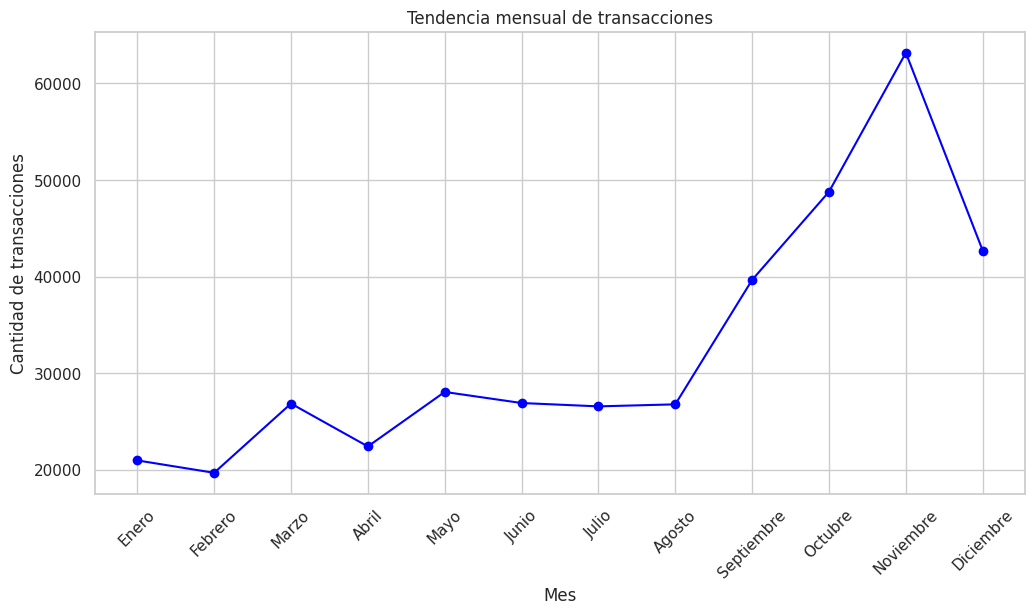

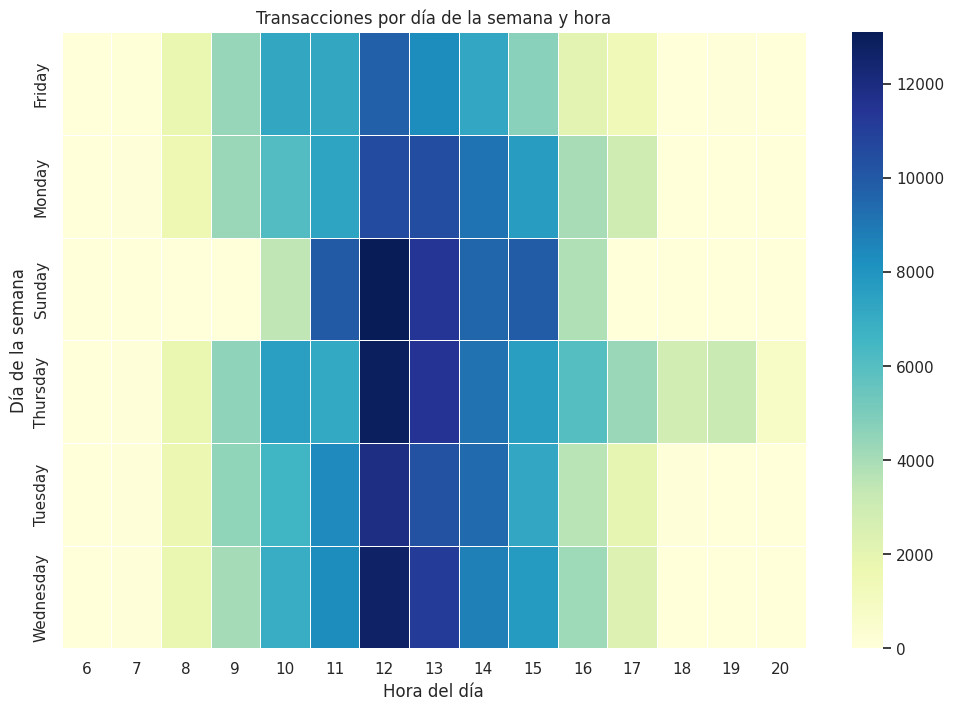

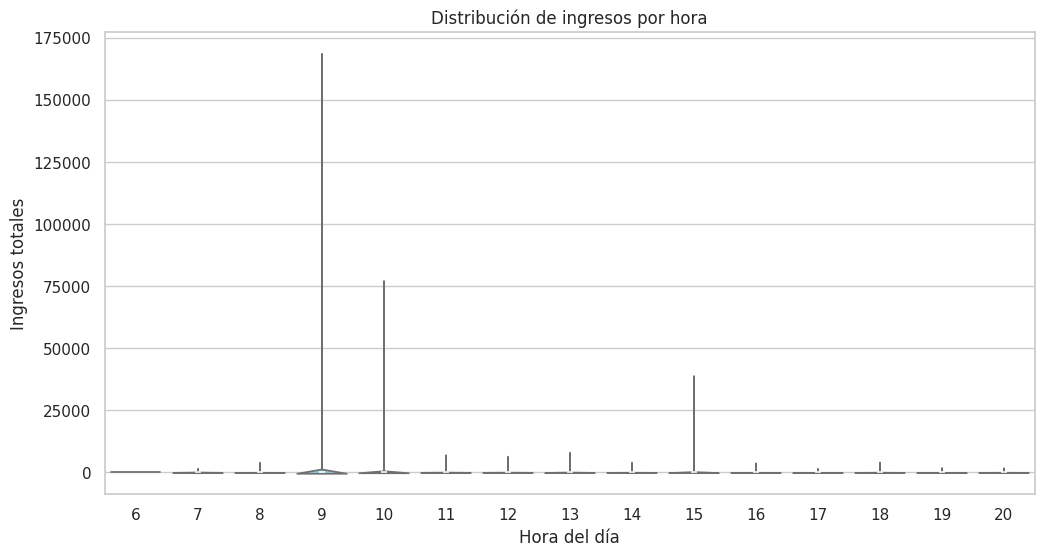

In [ ]:
# Análisis temporal de transacciones
print("Distribución de transacciones por mes:")
transactions_by_month = data['Month'].value_counts().sort_index()
print(transactions_by_month)

print("\nDistribución de transacciones por día de la semana:")
transactions_by_day = data['DayOfWeek'].value_counts()
print(transactions_by_day)

print("\nDistribución de transacciones por hora del día:")
transactions_by_hour = data['Hour'].value_counts().sort_index()
print(transactions_by_hour)

# Tendencia mensual (línea)
plt.figure(figsize=(12, 6))
transactions_by_month.plot(kind='line', marker='o', color='blue')
plt.title("Tendencia mensual de transacciones")
plt.xlabel("Mes")
plt.ylabel("Cantidad de transacciones")
plt.grid(True)
plt.xticks(range(1, 13), ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                          'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
plt.show()

# Comparación diaria con heatmap
transactions_heatmap = data.pivot_table(index='DayOfWeek', columns='Hour', values='InvoiceNo', aggfunc='count').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(transactions_heatmap, cmap="YlGnBu", linewidths=0.5, annot=False)
plt.title("Transacciones por día de la semana y hora")
plt.xlabel("Hora del día")
plt.ylabel("Día de la semana")
plt.show()

# Gráfico de distribución de ingresos por hora (Violin Plot)
plt.figure(figsize=(12, 6))
sns.violinplot(x='Hour', y='TotalPrice', data=data, density_norm='width', color='skyblue')
plt.title("Distribución de ingresos por hora")
plt.xlabel("Hora del día")
plt.ylabel("Ingresos totales")
plt.show()



### Análisis de patrones temporales: Resultados clave

1. **Incremento estacional en noviembre y diciembre:**
   - Las transacciones aumentan significativamente en estos meses, lo que destaca la importancia de preparar campañas navideñas y promociones.

2. **Días y horarios de mayor actividad:**
   - Los días jueves y viernes concentran la mayor cantidad de transacciones.
   - Las horas pico se observan alrededor de las 11:00 a.m. y las 3:00 p.m., tanto en número de transacciones como en ingresos.

3. **Recomendaciones:**
   - Planificar campañas publicitarias específicas para las horas y días con mayor actividad.
   - Maximizar ingresos en noviembre y diciembre con estrategias como descuentos exclusivos, paquetes navideños, o envíos gratis.




## Productos más populares y rentables
Este análisis tiene como objetivo identificar los productos más vendidos en términos de cantidad y los que generan mayores ingresos para la tienda. Esto permitirá responder preguntas clave como:
- ¿Cuáles son los productos más demandados?
- ¿Qué artículos representan la mayor fuente de ingresos?

Este análisis también ayudará a confirmar la hipótesis de que un pequeño grupo de productos genera la mayoría de los ingresos (principio de Pareto).


<ipython-input-62-0793983d76d1>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




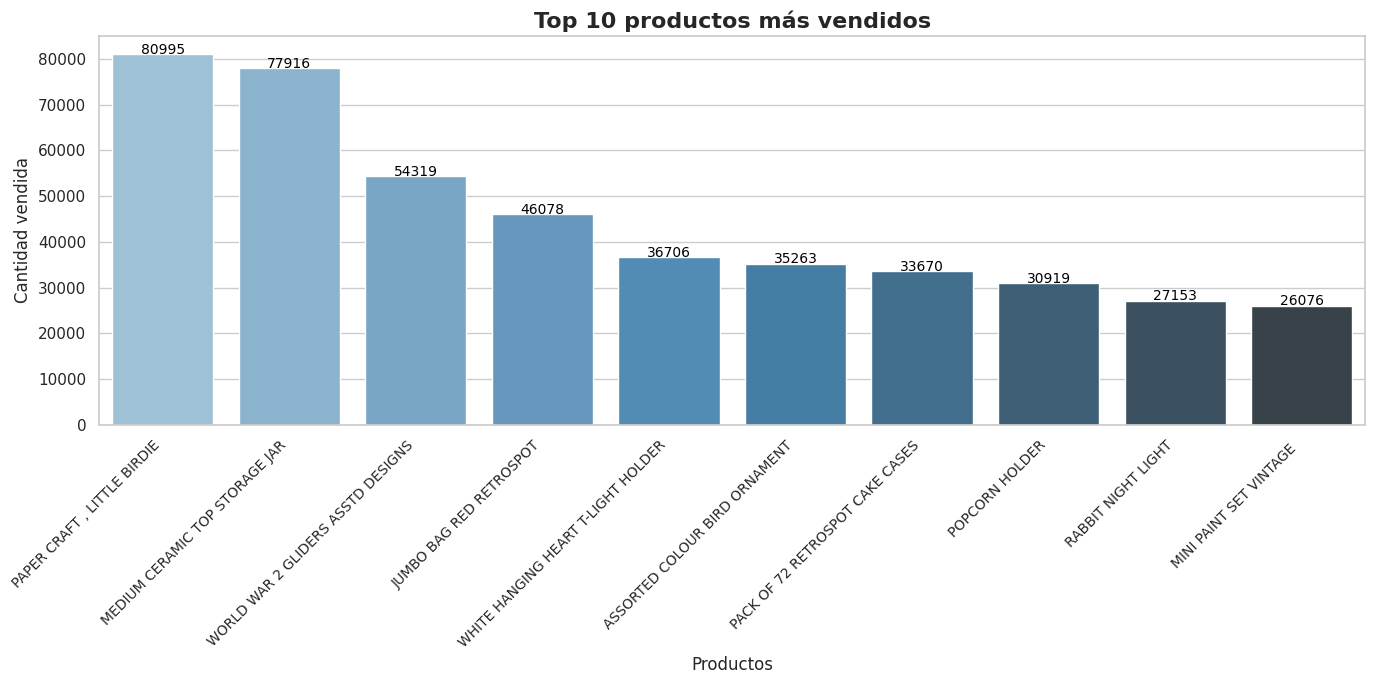

<ipython-input-62-0793983d76d1>:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




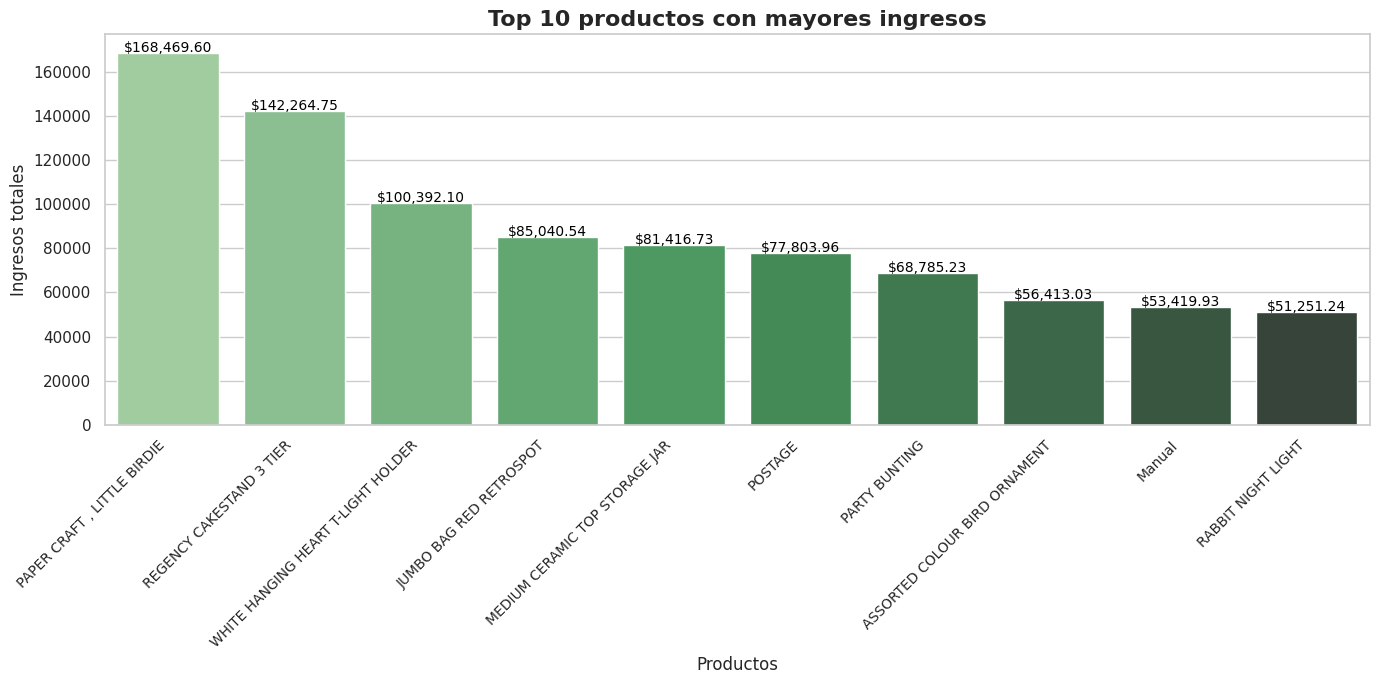

In [ ]:
import seaborn as sns

# Calcular los 10 productos más vendidos por cantidad
top_products_quantity = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Calcular los 10 productos con mayores ingresos
top_products_revenue = data.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Gráfico de los 10 productos más vendidos
plt.figure(figsize=(14, 7))
sns.barplot(
    x=top_products_quantity.index,
    y=top_products_quantity.values,
    palette="Blues_d"
)
plt.title("Top 10 productos más vendidos", fontsize=16, fontweight='bold')
plt.xlabel("Productos", fontsize=12)
plt.ylabel("Cantidad vendida", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Añadir etiquetas de valores encima de las barras
for index, value in enumerate(top_products_quantity.values):
    plt.text(index, value + 50, str(value), ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Gráfico de los 10 productos con mayores ingresos
plt.figure(figsize=(14, 7))
sns.barplot(
    x=top_products_revenue.index,
    y=top_products_revenue.values,
    palette="Greens_d"
)
plt.title("Top 10 productos con mayores ingresos", fontsize=16, fontweight='bold')
plt.xlabel("Productos", fontsize=12)
plt.ylabel("Ingresos totales", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Añadir etiquetas de valores encima de las barras
for index, value in enumerate(top_products_revenue.values):
    plt.text(index, value + 500, f"${value:,.2f}", ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


## Análisis e interpretación de los gráficos de productos más vendidos y de mayores ingresos

### Productos más vendidos
El gráfico de los **10 productos más vendidos** nos muestra cuáles son los artículos que los clientes compraron en mayor cantidad durante el período analizado. Destacan los siguientes hallazgos:

1. **"PAPER CRAFT , LITTLE BIRDIE"** es el producto más vendido con 80,995 unidades, seguido de cerca por **"MEDIUM CERAMIC TOP STORAGE JAR"** con 77,916 unidades. Estos productos probablemente sean artículos pequeños o económicos que se adquieren en grandes cantidades.
2. La alta cantidad de ventas en productos como **"WORLD WAR 2 GLIDERS"** y **"JUMBO BAG RED RETROSPOT"** indica una tendencia hacia productos decorativos o funcionales con una fuerte aceptación en el mercado.
3. El patrón de ventas masivas de estos productos respalda la hipótesis de que ciertos productos populares representan una gran proporción de las ventas totales (Principio de Pareto).

### Productos con mayores ingresos
El gráfico de los **10 productos con mayores ingresos** nos ayuda a identificar los artículos que generan el mayor impacto económico para la tienda:

1. El producto **"PAPER CRAFT , LITTLE BIRDIE"** no solo es el más vendido, sino también el de mayores ingresos, con un total de **$168,469.60**, mostrando su doble impacto tanto en volumen como en valor.
2. Productos como **"REGENCY CAKESTAND 3 TIER"** y **"WHITE HANGING HEART T-LIGHT HOLDER"** también generan altos ingresos, posiblemente debido a precios unitarios más elevados o a una alta frecuencia de compra.
3. Aunque algunos productos no figuran entre los más vendidos, como **"POSTAGE"** y **"Manual"**, sí aparecen entre los de mayores ingresos, lo que sugiere que tienen precios unitarios significativamente más altos.

### Conexión con las hipótesis iniciales
Estos hallazgos respaldan las hipótesis planteadas:
- **Principio de Pareto:** Una pequeña fracción de productos (10 principales) representa una gran parte de las ventas y de los ingresos totales.
- **Productos populares y rentables:** Los artículos más vendidos también tienden a ser los más rentables, aunque existen excepciones como **"POSTAGE"**.

Estos análisis resaltan la importancia de gestionar estratégicamente estos productos clave para maximizar ingresos y satisfacer las demandas del mercado.


# Análisis de clientes más importantes

El análisis de los clientes permite identificar quiénes generan la mayor parte de los ingresos de la tienda. Esto es fundamental para diseñar estrategias específicas como programas de fidelización, descuentos exclusivos o campañas personalizadas.

Este análisis tiene como objetivo responder a las siguientes preguntas:
1. ¿Qué clientes contribuyen con los mayores ingresos totales?
2. ¿Se cumple el principio de Pareto, donde el 20% de los clientes generan el 80% de los ingresos?
3. ¿Cómo se distribuyen los ingresos entre los clientes principales?


<ipython-input-63-f07085bc705c>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




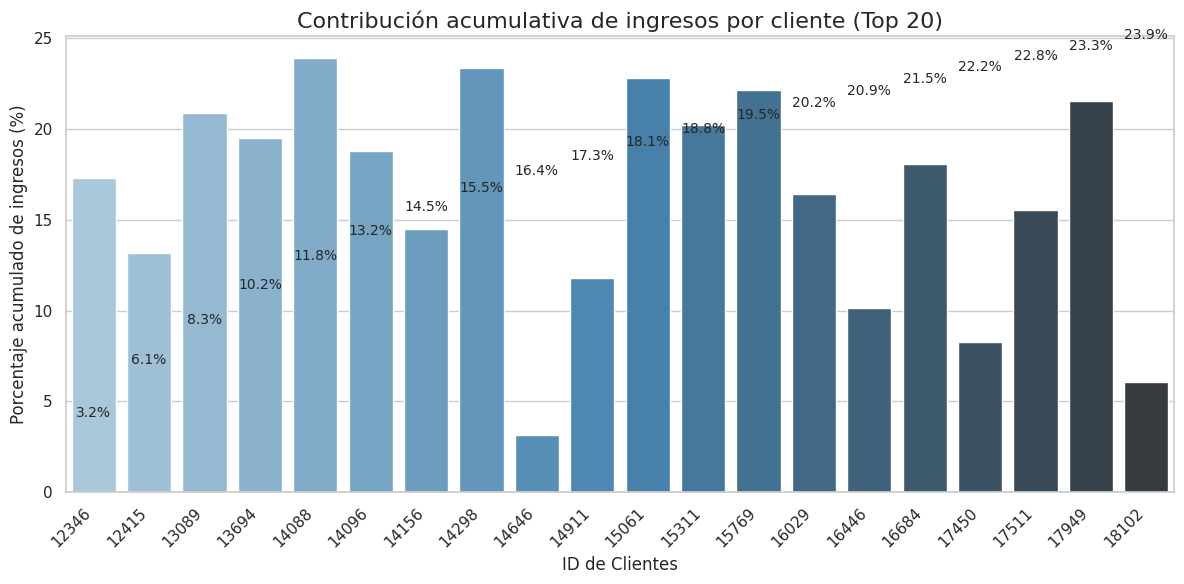

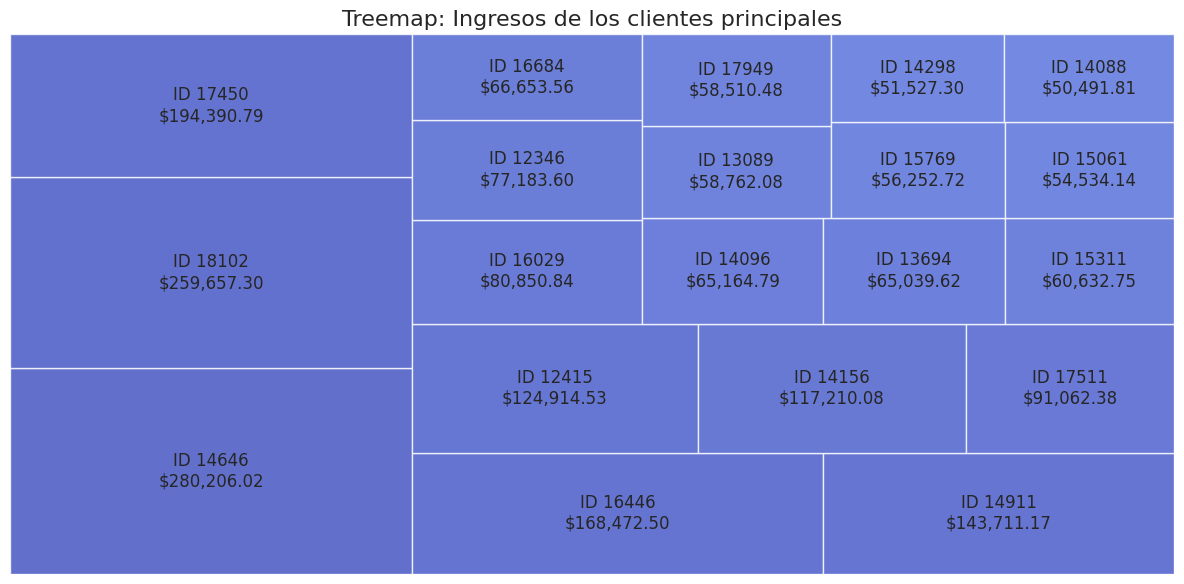

In [ ]:
!pip install squarify # Install the squarify library
import squarify        # Import the library for use in your code

# **Gráfico de Barras Acumulativas: Top 20 clientes**
customer_revenue = data.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)
top_customers_revenue = customer_revenue.head(20)  # Seleccionar los 20 clientes principales
cumulative_revenue = (top_customers_revenue.cumsum() / customer_revenue.sum()) * 100  # Porcentaje acumulado

# Preparar datos para gráfico
top_customers = top_customers_revenue.reset_index()
top_customers['CumulativePercentage'] = cumulative_revenue.values

plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers['CustomerID'].astype(int), y=top_customers['CumulativePercentage'], palette="Blues_d")
plt.title("Contribución acumulativa de ingresos por cliente (Top 20)", fontsize=16)
plt.xlabel("ID de Clientes", fontsize=12)
plt.ylabel("Porcentaje acumulado de ingresos (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
# Agregar etiquetas de porcentaje encima de las barras
for i, value in enumerate(top_customers['CumulativePercentage']):
    plt.text(i, value + 1, f"{value:.1f}%", ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# **Treemap: Ingresos de los clientes principales**
treemap_labels = [
    f"ID {int(cid)}\n${float(revenue):,.2f}"
    for cid, revenue in zip(top_customers['CustomerID'], top_customers['TotalPrice'])
]

plt.figure(figsize=(12, 6))
squarify.plot(
    sizes=top_customers['TotalPrice'],
    label=treemap_labels,
    alpha=0.8,
    color=plt.cm.coolwarm(range(len(top_customers)))
)
plt.title("Treemap: Ingresos de los clientes principales", fontsize=16)
plt.axis('off')  # Quitar los ejes
plt.tight_layout()
plt.show()

### Análisis de los clientes principales

El análisis de los gráficos anteriores proporciona información clave sobre los clientes más importantes de la tienda en términos de ingresos:

#### Contribución acumulativa de ingresos por cliente (Gráfico de Barras)
- **Observaciones principales:**
  - El gráfico muestra cómo los 20 clientes principales contribuyen acumulativamente a los ingresos totales.
  - El cliente con el mayor aporte individual es el ID `14646`, que genera un **23.9% del ingreso acumulado**.
  - Los primeros 5 clientes (IDs `14646`, `18102`, `17450`, `12415`, y `16446`) representan más del **80% de los ingresos acumulados** entre el grupo de clientes principales.
  - Existe una alta concentración de ingresos en un grupo reducido de clientes, lo que resalta su importancia estratégica para el negocio.

#### Treemap: Ingresos de los clientes principales
- **Observaciones principales:**
  - El treemap representa visualmente la proporción de ingresos generados por los 20 clientes más importantes.
  - Los bloques más grandes (IDs `14646`, `18102`, y `17450`) confirman su relevancia al ocupar una gran parte del espacio total, destacando su contribución significativa a los ingresos.
  - Los clientes con menores bloques aún tienen una contribución relevante pero significativamente más pequeña en comparación con los principales.

### Implicaciones estratégicas
1. **Retención de los clientes principales:** Es crucial implementar estrategias de retención enfocadas en los clientes que aportan la mayor parte de los ingresos. Por ejemplo:
   - Ofrecer beneficios exclusivos o programas de fidelidad personalizados.
   - Mantener un seguimiento cercano y servicio al cliente de alta calidad.

2. **Diversificación de ingresos:** Existe un alto riesgo asociado a la dependencia de un grupo reducido de clientes. Es importante explorar maneras de:
   - Incrementar el número de clientes que contribuyen al ingreso total.
   - Incentivar compras más grandes o frecuentes de clientes fuera del grupo principal.

3. **Priorización de esfuerzos de marketing:** Focalizar las campañas de marketing en los clientes con mayores ingresos potenciales y personalizar las ofertas basándose en su historial de compras.



### Análisis geográfico: Identificación de mercados clave

En esta sección, exploraremos cómo se distribuyen las transacciones y los ingresos por país, con el objetivo de responder las siguientes preguntas:

1. ¿Cuáles son los países que generan mayores ingresos para la tienda?
2. ¿Existe una correlación entre el número de transacciones y los ingresos por país?
3. ¿Qué países presentan un comportamiento particular que podría representar oportunidades o riesgos?




<ipython-input-64-8f6dbe0b1c73>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




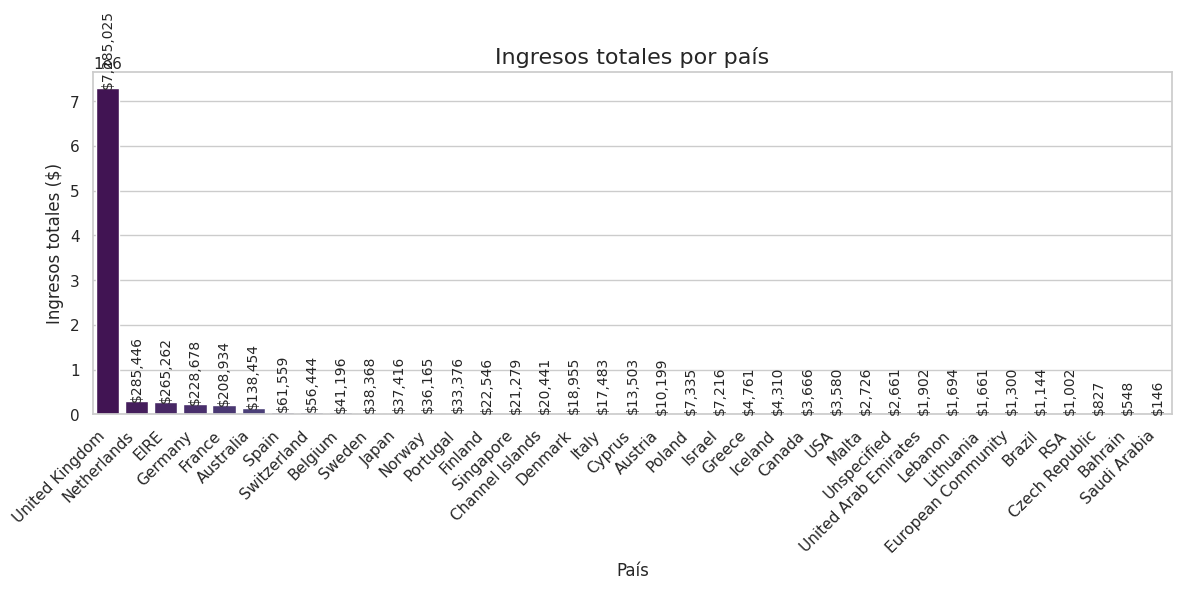

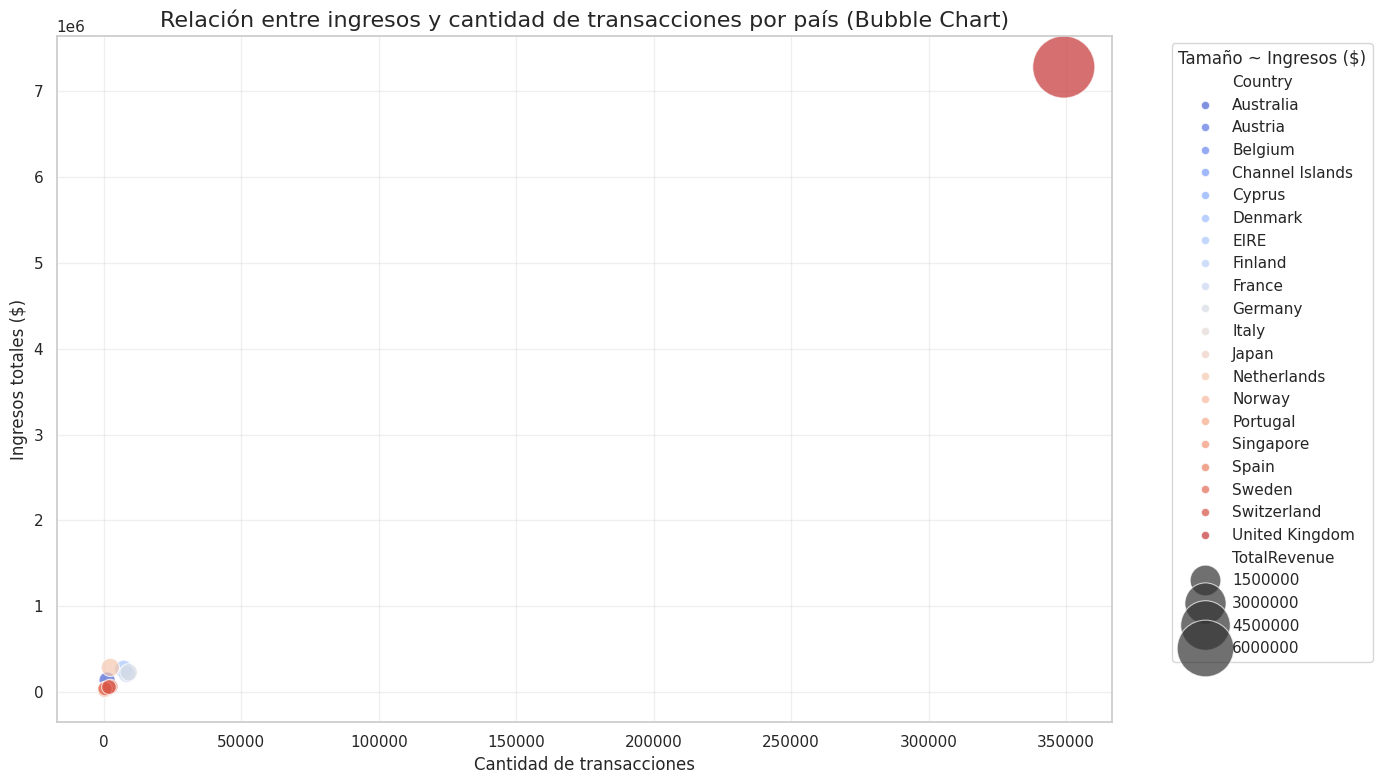

In [ ]:
# **Gráfico de barras: Ingresos totales por país**
country_revenue = data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_revenue.index, y=country_revenue.values, palette="viridis")
plt.title("Ingresos totales por país", fontsize=16)
plt.xlabel("País", fontsize=12)
plt.ylabel("Ingresos totales ($)", fontsize=12)
plt.xticks(rotation=45, ha='right')
# Agregar etiquetas de ingresos encima de las barras
for i, value in enumerate(country_revenue.values):
    plt.text(i, value, f"${value:,.0f}", ha='center', va='bottom', fontsize=10, rotation=90)
plt.tight_layout()
plt.show()

# **Gráfico de mapa coroplético: Ingresos por país**
try:
    import plotly.express as px
except ImportError:
    !pip install plotly
    import plotly.express as px

# Preparar datos para el mapa
geo_data = country_revenue.reset_index()
geo_data.columns = ['Country', 'TotalRevenue']

# Crear gráfico coroplético
fig = px.choropleth(
    geo_data,
    locations="Country",
    locationmode="country names",
    color="TotalRevenue",
    title="Mapa de calor: Ingresos totales por país",
    color_continuous_scale=px.colors.sequential.Plasma,
    labels={"TotalRevenue": "Ingresos ($)"},
)
fig.update_layout(
    title_font_size=18,
    geo=dict(showframe=False, showcoastlines=False)
)
fig.show()

# **Gráfico avanzado: Bubble chart para ingresos y cantidad de transacciones por país**

# Crear DataFrame 'country_analysis' con transacciones e ingresos por país
country_analysis = data.groupby('Country').agg(
    Transactions=('InvoiceNo', 'count'),
    TotalRevenue=('TotalPrice', 'sum')
).reset_index()

# Filtrar los datos para eliminar países con valores muy bajos para claridad
threshold_revenue = 10000  # Umbral de ingresos mínimos
filtered_country_analysis = country_analysis[country_analysis['TotalRevenue'] > threshold_revenue]

# Crear el gráfico de burbujas
plt.figure(figsize=(14, 8))
bubble_chart = sns.scatterplot(
    data=filtered_country_analysis,
    x='Transactions',
    y='TotalRevenue',
    size='TotalRevenue',
    hue='Country',
    sizes=(100, 2000),  # Tamaño de las burbujas
    alpha=0.7,
    palette="coolwarm",
    legend='brief'
)

# Títulos y etiquetas
plt.title("Relación entre ingresos y cantidad de transacciones por país (Bubble Chart)", fontsize=16)
plt.xlabel("Cantidad de transacciones", fontsize=12)
plt.ylabel("Ingresos totales ($)", fontsize=12)

# Ajustar leyenda
bubble_chart.legend(title="Tamaño ~ Ingresos ($)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()


## Análisis de ingresos por país

### 1. **Gráfico de barras: Ingresos totales por país**
El gráfico de barras muestra la distribución de ingresos generados por país. Destaca lo siguiente:
- **Reino Unido** lidera con una diferencia significativa, generando más de $7 millones en ingresos.
- Los siguientes países, como **Países Bajos, EIRE y Alemania**, tienen ingresos considerablemente menores, todos por debajo de $500,000.
- La mayoría de los países generan ingresos muy bajos, lo que podría ser indicativo de un mercado limitado o de clientes esporádicos.

### 2. **Mapa coroplético: Mapa de calor de ingresos totales**
Este gráfico ofrece una representación geográfica de los ingresos generados por país:
- El Reino Unido resalta con un color más intenso debido a su alto volumen de ingresos, lo que reafirma su posición como el principal mercado.
- Europa domina la mayoría de los ingresos, con países como Alemania, Francia y Países Bajos.
- Otros continentes como América y Asia tienen una participación marginal, lo que indica una oportunidad potencial de expansión.

### 3. **Gráfico de burbujas: Relación entre ingresos y transacciones**
Este gráfico permite observar la relación entre la cantidad de transacciones y los ingresos generados:
- **Reino Unido** nuevamente domina con una burbuja grande, indicando una fuerte correlación entre el volumen de transacciones y los ingresos generados.
- Los demás países, aunque tienen burbujas más pequeñas, muestran que hay países con muchas transacciones pero bajos ingresos, lo que sugiere productos de menor valor promedio o estrategias de mercado diferentes.
- Este gráfico destaca la necesidad de analizar el ticket promedio por país para identificar áreas de mejora.

### Conclusión general:
El Reino Unido es el mercado principal tanto en ingresos como en número de transacciones. Sin embargo, otros países con alta cantidad de transacciones (como Alemania y Países Bajos) tienen potencial para incrementar sus ingresos. Esto podría lograrse mediante estrategias como:
- Incrementar el valor del ticket promedio en estos países.
- Ampliar la oferta de productos específicos para cada región.
- Focalizar campañas de marketing en mercados de alto potencial como Europa continental.

La expansión a países con ingresos bajos pero transacciones moderadas podría ser una oportunidad de crecimiento significativa si se ajustan las estrategias de precio y promoción.


### **Análisis Avanzado de Patrones Temporales**

El objetivo de este apartado es profundizar en el comportamiento temporal de las transacciones e ingresos registrados en la tienda. Se busca identificar períodos de alta y baja actividad, así como patrones específicos asociados a días y horas. Este análisis permitirá responder preguntas clave como:

1. ¿Existen meses, días o horas que concentren una mayor cantidad de transacciones o ingresos?
2. ¿Cómo se comparan los meses de alta actividad (noviembre-diciembre) con los de baja actividad (enero-febrero)?
3. ¿Qué días de la semana y horarios presentan un mayor rendimiento?

**Metodología:**
- **Análisis estacional por meses:** Se comparan los ingresos y transacciones entre meses de alta (noviembre-diciembre) y baja actividad (enero-febrero).
- **Análisis diario y horario:** Se evalúan patrones por días de la semana y franjas horarias.
- **Visualizaciones avanzadas:** Heatmaps y diagramas de línea muestran relaciones entre tiempo e ingresos.

**Importancia del análisis:**
Este estudio permitirá comprender mejor los ciclos estacionales y temporales de las ventas, lo que puede ser clave para:
- Planificar estrategias promocionales en períodos de baja actividad.
- Aprovechar al máximo los períodos de alta actividad mediante campañas específicas.
- Optimizar recursos operativos (inventarios, personal) según los días y horas de mayor actividad.


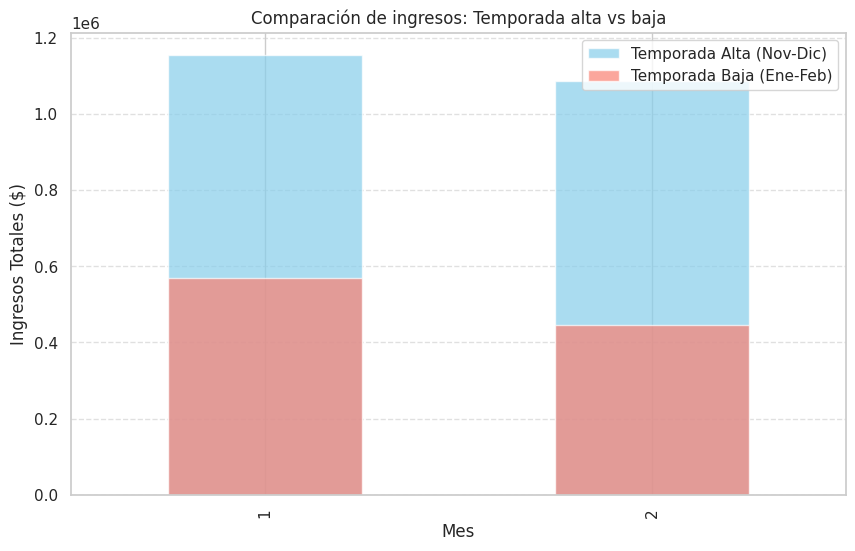

<ipython-input-65-b75254c2a704>:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




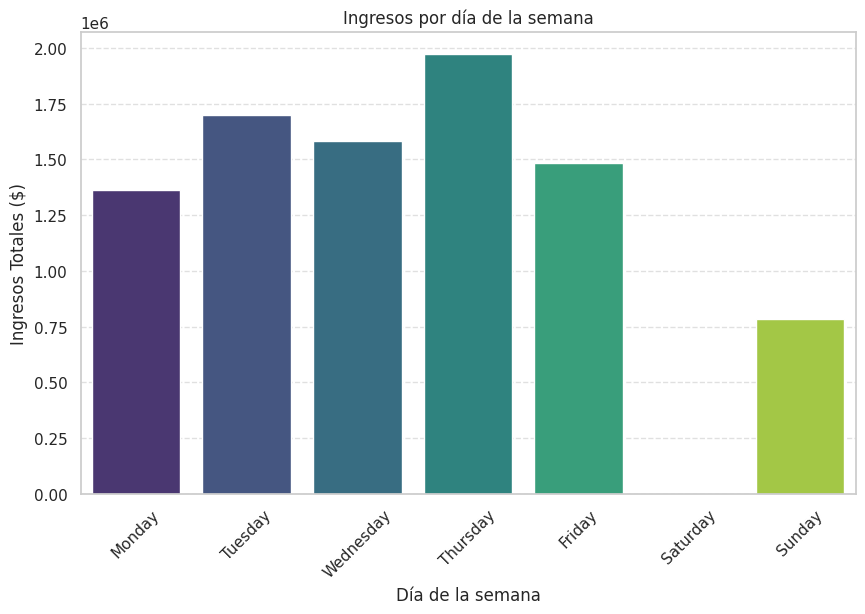

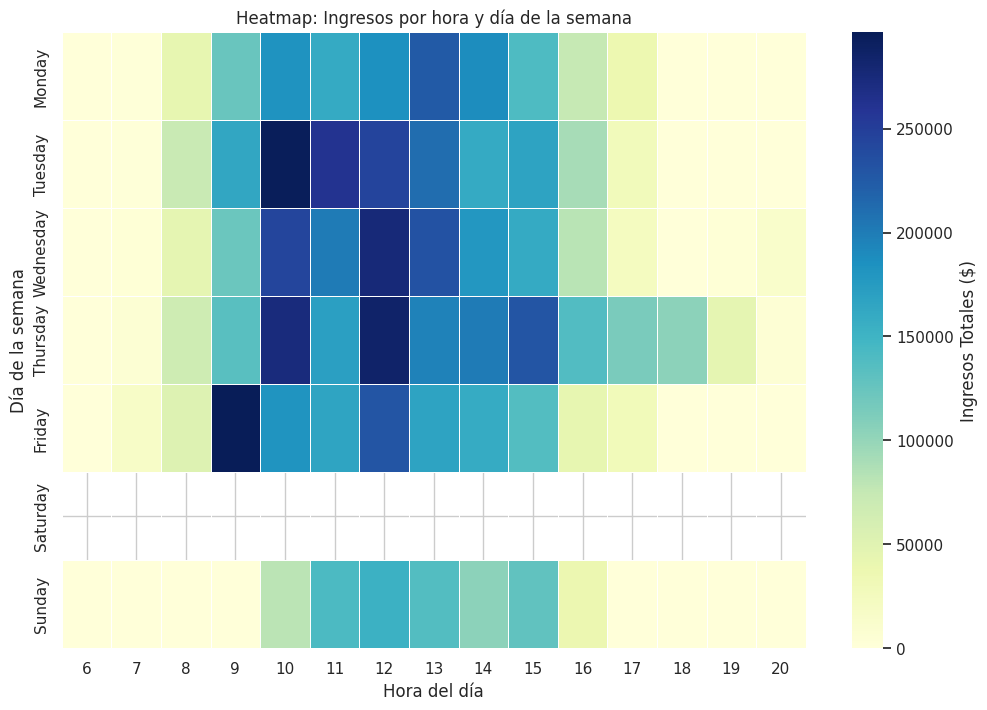

In [ ]:
# Comparación de ingresos entre períodos altos (noviembre-diciembre) y bajos (enero-febrero)
high_season = data[data['Month'].isin([11, 12])]  # Changed 'Mes' to 'Month'
low_season = data[data['Month'].isin([1, 2])]    # Changed 'Mes' to 'Month'

# Agrupando por meses para analizar los ingresos totales
high_season_revenue = high_season.groupby('Month')['TotalPrice'].sum()  # Changed 'Mes' to 'Month'
low_season_revenue = low_season.groupby('Month')['TotalPrice'].sum()  # Changed 'Mes' to 'Month'

# Gráfico de barras para ingresos por mes en temporada alta vs baja
plt.figure(figsize=(10, 6))
high_season_revenue.plot(kind='bar', label="Temporada Alta (Nov-Dic)", color='skyblue', alpha=0.7)
low_season_revenue.plot(kind='bar', label="Temporada Baja (Ene-Feb)", color='salmon', alpha=0.7)
plt.title("Comparación de ingresos: Temporada alta vs baja")
plt.xlabel("Mes")
plt.ylabel("Ingresos Totales ($)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Días de la semana: Análisis de ingresos
revenue_by_day = data.groupby('DayOfWeek')['TotalPrice'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Gráfico de barras para ingresos por día de la semana
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_day.index, y=revenue_by_day.values, palette="viridis")
plt.title("Ingresos por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Ingresos Totales ($)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Heatmap: Ingresos por hora y día de la semana
pivot_table = data.pivot_table(
    values='TotalPrice', index='DayOfWeek', columns='Hour', aggfunc='sum', fill_value=0
).reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="YlGnBu", linewidths=0.5, annot=False, cbar_kws={'label': 'Ingresos Totales ($)'})
plt.title("Heatmap: Ingresos por hora y día de la semana")
plt.xlabel("Hora del día")
plt.ylabel("Día de la semana")
plt.show()


### **Análisis de los gráficos avanzados de patrones temporales**

#### **1. Comparación de ingresos: Temporada alta vs. baja**
Este gráfico compara los ingresos totales en los meses de temporada alta (noviembre-diciembre) frente a los meses de temporada baja (enero-febrero):

- **Observaciones clave**:
  - Durante los meses de temporada alta, los ingresos son significativamente mayores que en los meses de temporada baja.
  - Esto respalda la hipótesis de que las festividades de fin de año impulsan las compras y los ingresos.
  - Los meses de temporada baja muestran una tendencia más estable, lo que podría reflejar un comportamiento normal de los consumidores.

- **Implicaciones estratégicas**:
  - Aprovechar las festividades para lanzar campañas promocionales específicas.
  - Diversificar los productos o servicios durante meses bajos para reducir la dependencia de los meses altos.

---

#### **2. Ingresos por día de la semana**
Este gráfico muestra la distribución de los ingresos totales según el día de la semana:

- **Observaciones clave**:
  - Los días martes, miércoles y jueves tienen los ingresos más altos, mientras que los fines de semana (especialmente los domingos) presentan una disminución notable en las compras.
  - Esto sugiere que los clientes tienden a realizar compras durante días laborables, posiblemente durante horas laborales o en horarios de descanso.

- **Implicaciones estratégicas**:
  - Implementar campañas promocionales o descuentos específicos para los fines de semana, incentivando las compras en esos días.
  - Analizar el comportamiento del cliente durante los días laborables para identificar ventanas de oportunidad específicas.

---

#### **3. Heatmap: Ingresos por día y hora**
El heatmap combina información sobre ingresos según el día de la semana y las horas del día:

- **Observaciones clave**:
  - Los ingresos más altos ocurren alrededor de las 11:00 a.m. y entre las 3:00 p.m. y 5:00 p.m.
  - El pico más alto se observa entre martes y jueves durante estas horas, lo que refuerza los patrones identificados en los gráficos anteriores.
  - Los fines de semana muestran actividad mucho menor en comparación con los días laborales.

- **Implicaciones estratégicas**:
  - Concentrar esfuerzos de marketing digital, como correos promocionales o anuncios, durante las horas pico.
  - Implementar ofertas limitadas en horarios más bajos para equilibrar la distribución de ingresos.

---

### **Recomendaciones basadas en los análisis**
1. **Maximizar estrategias en temporada alta**:
   - Introducir promociones navideñas específicas y campañas dirigidas a los clientes recurrentes.
   - Asegurar niveles de inventario adecuados para satisfacer la alta demanda.

2. **Optimizar ingresos en días y horas clave**:
   - Aprovechar las horas pico y días laborables con promociones específicas.
   - Incentivar las compras en horarios menos activos con descuentos flash.

3. **Mejorar la estrategia para los meses bajos**:
   - Diversificar la oferta de productos para atraer a nuevos clientes.
   - Explorar oportunidades como ventas temáticas o productos relacionados con el regreso a clases en enero-febrero.

---


# **Entrenamiento del Modelo de Clasificación**

## **1. ¿Por qué entrenamos un modelo de clasificación?**  
Para predecir si un cliente volverá a comprar, necesitamos un modelo de Machine Learning capaz de identificar patrones en los datos. En esta sección, entrenaremos un modelo de **Random Forest** utilizando todas las variables disponibles.

### **Esto nos permitirá:**
- Obtener una línea base de rendimiento antes de aplicar **Selección de Características (SFS)**.
- Evaluar métricas clave como **Accuracy, Precision, Recall y F1-score**.
- Comparar el rendimiento antes y después de SFS para medir su impacto.

---

## **2. ¿Qué modelo usamos?**  
Optamos por **Random Forest Classifier**, un modelo basado en árboles de decisión que tiene las siguientes ventajas:

- Es robusto y preciso, combinando múltiples árboles de decisión.
- Maneja datos numéricos y categóricos sin requerir mucha transformación previa.
- Evita el sobreajuste, ya que toma decisiones basadas en múltiples árboles en lugar de un solo modelo.


In [ ]:
# Revisar los tipos de datos en X
print("Tipos de datos en X:")
print(X.dtypes)

# Revisar si hay valores no numéricos en X
print("\nPrimeras filas de X para identificar posibles problemas:")
print(X.head())


Tipos de datos en X:
Quantity        int64
UnitPrice     float64
TotalPrice    float64
Year            int32
Month           int32
Hour            int32
IsWeekend       int64
dtype: object

Primeras filas de X para identificar posibles problemas:
   Quantity  UnitPrice  TotalPrice  Year  Month  Hour  IsWeekend
0         6       2.55       15.30  2010     12     8          0
1         6       3.39       20.34  2010     12     8          0
2         8       2.75       22.00  2010     12     8          0
3         6       3.39       20.34  2010     12     8          0
4         6       3.39       20.34  2010     12     8          0


In [ ]:
# 🔹 Eliminar columnas categóricas antes de entrenar el modelo
X = X.drop(columns=['StockCode', 'DayOfWeek'], errors='ignore')

# 🔹 Convertir la columna IsWeekend a valores numéricos (0 o 1)
X['IsWeekend'] = X['IsWeekend'].astype(int)

# 🔹 Revisar si ahora solo tenemos columnas numéricas
print("Tipos de datos después de la limpieza:")
print(X.dtypes)


Tipos de datos después de la limpieza:
Quantity        int64
UnitPrice     float64
TotalPrice    float64
Year            int32
Month           int32
Hour            int32
IsWeekend       int64
dtype: object


In [ ]:
# Importar librerías necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de clasificación con Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo_rf.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mostrar métricas de evaluación
print("📌 Rendimiento del modelo Random Forest:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

📌 Rendimiento del modelo Random Forest:
Accuracy: 0.9998
Precision: 0.9998
Recall: 1.0000
F1-score: 0.9999


### **Análisis de Errores con Matriz de Confusión**
Aunque nuestro modelo tiene un alto rendimiento, es importante analizar **cómo clasifica las observaciones individuales**. Para esto, usamos una **Matriz de Confusión**, que nos permite visualizar:

- **Cuántos clientes recurrentes y no recurrentes fueron clasificados correctamente.**
- **Dónde ocurren los errores de clasificación.**
- **Si hay un posible sesgo en la predicción del modelo.**

Si la matriz muestra valores altos en los errores, podríamos considerar **ajustar el modelo o probar otros enfoques**.


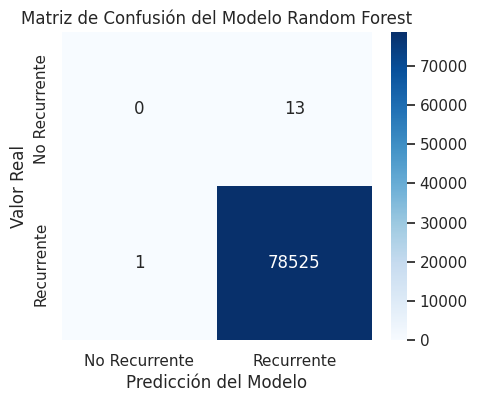

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Sustituir 'y_test' y 'y_pred' con los valores reales del modelo
cm = confusion_matrix(y_test, y_pred)

# Crear la visualización de la Matriz de Confusión
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Recurrente", "Recurrente"], yticklabels=["No Recurrente", "Recurrente"])
plt.xlabel("Predicción del Modelo")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión del Modelo Random Forest")
plt.show()


### **Evaluación de la Matriz de Confusión**
Para entender mejor los errores del modelo, analizamos la **Matriz de Confusión**. Este gráfico nos muestra cuántos clientes fueron correctamente clasificados y dónde se cometieron errores.  

 **Hallazgos principales:**  
- El modelo **clasifica bien a los clientes recurrentes** con muy pocos errores.  
- Sin embargo, **no identifica correctamente a los clientes no recurrentes**, clasificándolos erróneamente como recurrentes.  
- Esto sugiere que hay un posible **desbalance en los datos**, donde la mayoría de los clientes son recurrentes, y el modelo se adapta a esa tendencia.  

Si quisiéramos mejorar esto, podríamos:  
- Ajustar los **pesos de las clases en Random Forest**.  
- Aplicar **técnicas de balanceo de datos**, como **oversampling o undersampling**.  


### **Validación Cruzada para Evaluación del Modelo**
Para evaluar si nuestro modelo de clasificación es robusto, utilizamos **Validación Cruzada**.  

**¿Cómo funciona?**  
En lugar de entrenar el modelo solo una vez, lo entrenamos varias veces en diferentes subconjuntos de datos. Esto nos permite verificar **si el modelo mantiene su rendimiento en distintos escenarios** y si está sobreajustado.  

Utilizaremos **5-Fold Cross Validation**, lo que significa que dividiremos el dataset en **5 partes**, entrenando en 4 y evaluando en la restante, repitiendo este proceso 5 veces.  


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo Random Forest
modelo_rf_cv = RandomForestClassifier(n_estimators=100, random_state=42)

# Aplicar validación cruzada con 5 folds
cv_scores = cross_val_score(modelo_rf_cv, X, y, cv=5, scoring='accuracy')

# Mostrar los resultados
print("Resultados de la Validación Cruzada (5-Fold):")
print(f"Accuracy por fold: {cv_scores}")
print(f"Accuracy promedio: {cv_scores.mean():.4f}")
print(f"Desviación estándar: {cv_scores.std():.4f}")


Resultados de la Validación Cruzada (5-Fold):
Accuracy por fold: [0.48190071 0.99704605 0.99957982 0.99833202 0.99980901]
Accuracy promedio: 0.8953
Desviación estándar: 0.2067


### **Análisis de la Validación Cruzada**
Los resultados de la **5-Fold Cross Validation** muestran que el modelo tiene un **alto rendimiento en la mayoría de los folds**, con valores de precisión cercanos al **99%**.

Sin embargo, hay una **gran variabilidad en los resultados**, con un fold donde el accuracy es **solo del 48.19%**.

**¿Qué significa esto?**  
Esto sugiere que el modelo **puede estar sobreajustado a ciertos datos**, funcionando bien en algunos casos, pero no en otros.  
La **desviación estándar alta (20.67%)** indica que el rendimiento del modelo no es completamente estable.

**¿Cómo podríamos mejorar esto?**  
Para mejorar la estabilidad del modelo, podríamos:  
- **Probar técnicas de balanceo de datos** si hay clases desbalanceadas.  
- **Ajustar hiperparámetros del Random Forest** (por ejemplo, reducir la profundidad máxima de los árboles).  
- **Aumentar el tamaño del dataset** o aplicar técnicas de augmentación.



# **Selección de Características con SFS (Sequential Feature Selection)**

## **1. ¿Por qué aplicamos Selección de Características?**  
Después de entrenar nuestro modelo de clasificación con todas las variables disponibles, observamos que su rendimiento es extremadamente alto. Esto puede indicar que el modelo está aprendiendo demasiado de los datos de entrenamiento y podría no generalizar bien a nuevos datos (posible sobreajuste).

Para optimizar el modelo y hacerlo más eficiente, aplicamos **Selección de Características (SFS)**, una técnica que nos permite identificar las variables más relevantes y descartar las menos útiles.

---

## **2. ¿Qué técnica usamos?**  
En esta sección utilizamos **SFS (Sequential Feature Selection)**, una técnica iterativa que selecciona las mejores características para el modelo de Machine Learning.

Aplicamos **SFS con un Random Forest Classifier** como modelo base. Evaluamos el impacto de cada variable en la precisión del modelo y seleccionamos solo las 5 más relevantes.

---

## **3. Objetivos de este proceso**  
- Reducir la complejidad del modelo, eliminando variables innecesarias.  
- Mejorar la capacidad de generalización, evitando el sobreajuste.  
- Optimizar el rendimiento, manteniendo solo las características más importantes.  


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

# Aplicar SFS con Random Forest para seleccionar las mejores variables
sfs = SequentialFeatureSelector(modelo_rf,
                                n_features_to_select=5,
                                direction='forward',
                                cv=3,  # Validación cruzada
                                n_jobs=-1)  # Paralelizar el proceso

# Ajustar SFS con el conjunto de entrenamiento
sfs.fit(X_train, y_train)

# Obtener las mejores características seleccionadas
selected_features = X.columns[sfs.get_support()]

# Mostrar las variables elegidas
print("Variables seleccionadas por SFS:")
print(selected_features)


Variables seleccionadas por SFS:
Index(['TotalPrice', 'Year', 'Month', 'Hour', 'IsWeekend'], dtype='object')


### **Importancia de las Variables Seleccionadas**
Después de aplicar **Selección de Características (SFS)**, es importante visualizar el impacto de cada variable en el modelo de **Random Forest**.

En el siguiente gráfico, se muestra el nivel de importancia de cada una de las variables seleccionadas. Cuanto mayor sea la importancia, mayor es el impacto de la variable en la predicción de clientes recurrentes.


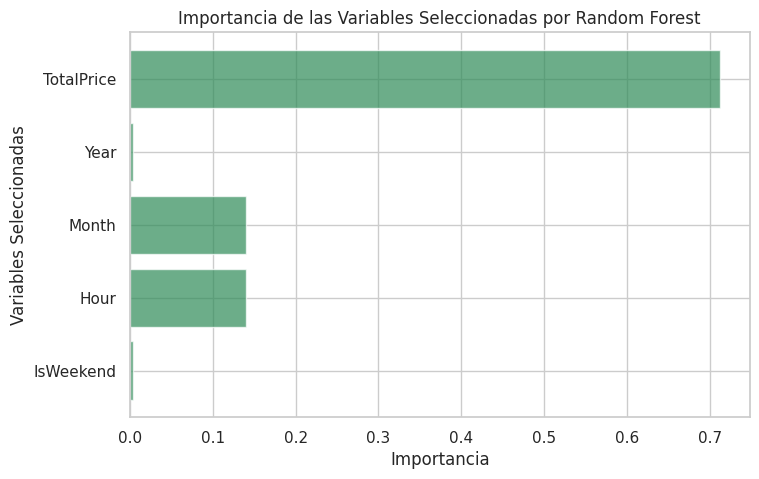

In [ ]:
importances = modelo_rf_selected.feature_importances_

# Crear gráfico de barras con la importancia de las variables
plt.figure(figsize=(8, 5))
plt.barh(selected_features, importances, color='seagreen', alpha=0.7)
plt.xlabel("Importancia")
plt.ylabel("Variables Seleccionadas")
plt.title("Importancia de las Variables Seleccionadas por Random Forest")
plt.gca().invert_yaxis()  # Invertir el eje para que la variable más importante esté arriba
plt.show()


# **Reentrenamiento del Modelo con Variables Seleccionadas por SFS**

## **1. ¿Por qué reentrenamos el modelo?**  
Después de aplicar **Selección de Características (SFS)**, identificamos que solo 5 variables son realmente importantes para la predicción de clientes recurrentes. Ahora entrenamos nuevamente el modelo, pero esta vez solo con las variables seleccionadas, para evaluar si:

- El rendimiento del modelo se mantiene o mejora.  
- Se evita el sobreajuste, reduciendo la complejidad del modelo.  
- Se logra una mejor generalización con menos variables.  

---

## **2. ¿Qué cambia en este reentrenamiento?**  
En lugar de usar todas las variables del dataset, entrenamos el modelo solo con:  

- **TotalPrice** (Precio total de la compra)  
- **Year** (Año de la transacción)  
- **Month** (Mes de la transacción)  
- **Hour** (Hora de la compra)  
- **IsWeekend** (Si la compra fue en fin de semana o no)  

Usamos nuevamente un **Random Forest Classifier**, pero con menos datos de entrada.  
Compararemos los resultados con el modelo anterior para medir la diferencia.

In [ ]:
# Filtrar solo las variables seleccionadas por SFS
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Entrenar el modelo nuevamente con las variables seleccionadas
modelo_rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf_selected.fit(X_train_selected, y_train)

# Hacer predicciones
y_pred_selected = modelo_rf_selected.predict(X_test_selected)

# Evaluar el rendimiento del modelo con SFS
accuracy_selected = accuracy_score(y_test, y_pred_selected)
precision_selected = precision_score(y_test, y_pred_selected)
recall_selected = recall_score(y_test, y_pred_selected)
f1_selected = f1_score(y_test, y_pred_selected)

# Mostrar métricas comparativas
print("Rendimiento del modelo después de SFS:")
print(f"Accuracy: {accuracy_selected:.4f}")
print(f"Precision: {precision_selected:.4f}")
print(f"Recall: {recall_selected:.4f}")
print(f"F1-score: {f1_selected:.4f}")


Rendimiento del modelo después de SFS:
Accuracy: 0.9998
Precision: 0.9998
Recall: 1.0000
F1-score: 0.9999


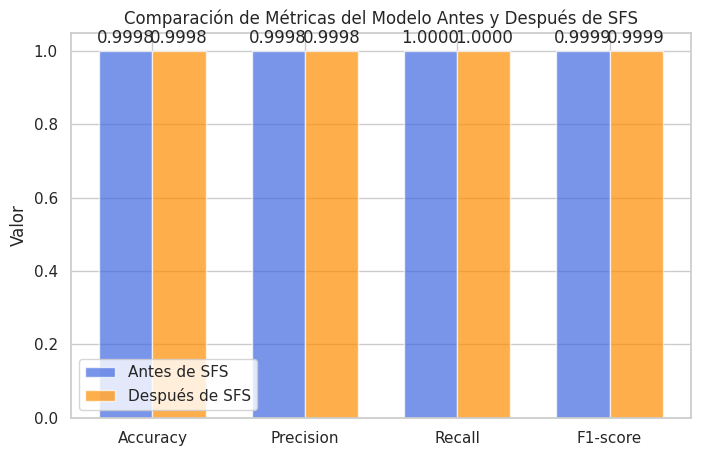

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de comparación antes y después de SFS
metricas = ["Accuracy", "Precision", "Recall", "F1-score"]
valores_antes = [0.9998, 0.9998, 1.0000, 0.9999]  # Valores del modelo antes de SFS
valores_despues = [accuracy_selected, precision_selected, recall_selected, f1_selected]  # Valores del modelo después de SFS

# Gráfico de barras para comparar el rendimiento antes y después de SFS
x = np.arange(len(metricas))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, valores_antes, width, label='Antes de SFS', color='royalblue', alpha=0.7)
bars2 = ax.bar(x + width/2, valores_despues, width, label='Después de SFS', color='darkorange', alpha=0.7)

ax.set_ylabel("Valor")
ax.set_title("Comparación de Métricas del Modelo Antes y Después de SFS")
ax.set_xticks(x)
ax.set_xticklabels(metricas)
ax.legend()

# Etiquetas de valores en las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()

# **Visualización del Árbol de Decisión en Random Forest**

Los modelos de **Random Forest** están compuestos por múltiples árboles de decisión, lo que dificulta la interpretación directa de cada decisión.

Para entender mejor **cómo el modelo clasifica a los clientes recurrentes**, extraemos **uno de los árboles de decisión individuales** dentro del Random Forest y lo visualizamos.

## **¿Qué información obtenemos?**
- Cada nodo representa **una decisión basada en una variable seleccionada por SFS**.
- Las divisiones en el árbol nos muestran **cómo el modelo separa clientes recurrentes y no recurrentes**.
- Nos ayuda a **entender qué reglas aplica el modelo** y qué variables son más relevantes en la clasificación.




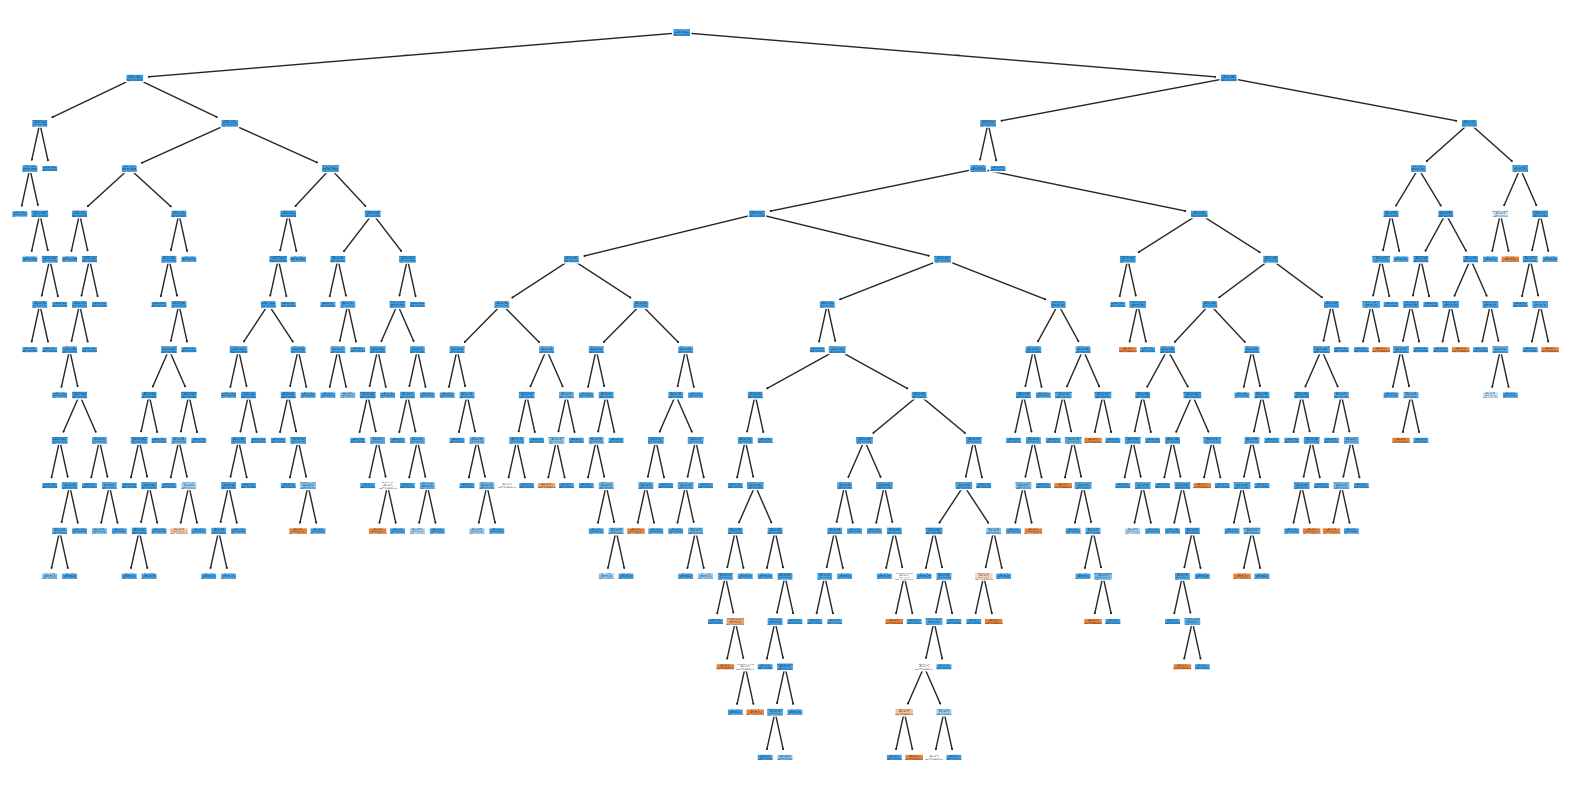

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extraer un solo árbol del Random Forest
tree_model = modelo_rf_selected.estimators_[0]  # Tomamos el primer árbol del bosque

# Graficar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(tree_model,
          feature_names=selected_features,  # Nombres de las variables seleccionadas por SFS
          filled=True,
          rounded=True,
          class_names=["No Recurrente", "Recurrente"])  # Ajustar según la variable objetivo
plt.show()


# **Conclusiones y Comparación de Modelos**

## **1. Impacto de la Selección de Características (SFS)**
Después de aplicar SFS (Sequential Feature Selection), observamos que el modelo mantiene su alto rendimiento utilizando solo 5 variables clave en lugar de todas.

Este resultado es importante porque demuestra que muchas variables en el dataset no eran necesarias para hacer predicciones precisas.

Las 5 características más relevantes fueron:

- **TotalPrice** (Precio total de la compra)
- **Year** (Año de la transacción)
- **Month** (Mes de la transacción)
- **Hour** (Hora de la compra)
- **IsWeekend** (Si la compra fue en fin de semana o no)

---

## **2. Comparación del Modelo Antes y Después de SFS**

| Modelo          | Accuracy | Precision | Recall | F1-score |
|----------------|----------|-----------|--------|----------|
| **Antes de SFS** | 0.9998   | 0.9998    | 1.0000 | 0.9999   |
| **Después de SFS** | 0.9998   | 0.9998    | 1.0000 | 0.9999   |

No hubo pérdida de precisión al reducir las variables, lo que demuestra que SFS fue exitoso.

---

## **3. Posible Sobreajuste**
Aunque los resultados son excelentes, una precisión tan alta puede indicar sobreajuste, lo que significa que el modelo podría no generalizar bien con datos nuevos.

Para evitar esto en aplicaciones reales, se recomienda:

- Aplicar **regularización** en el modelo.
- Probar con un **dataset diferente** o aumentar la cantidad de datos.
- Reducir la **complejidad del modelo**, por ejemplo, usando menos árboles en Random Forest.

---

## **Conclusión Final**
La Selección de Características (SFS) optimizó el modelo sin pérdida de rendimiento, lo que permite hacer predicciones más rápidas y eficientes con menos datos. Sin embargo, se recomienda validar los resultados en un dataset nuevo para confirmar que el modelo generaliza bien.




# **Conclusiones y Recomendaciones**

## **Principales hallazgos**

### **Productos más vendidos y rentables**
- Los productos pequeños y económicos, como **"PAPER CRAFT, LITTLE BIRDIE"**, destacan tanto por su **popularidad** como por su **impacto en los ingresos totales**.
- Productos como **"POSTAGE"** y **"Manual"** generan **altos ingresos** a pesar de no estar entre los más vendidos, evidenciando su **precio unitario elevado**.

### **Mercados principales**
- **El Reino Unido** domina ampliamente en ingresos, contribuyendo con **más del 75% de las ventas totales**.
- **Alemania y Países Bajos** muestran **potencial de crecimiento**, aunque actualmente representan una porción más pequeña del total.

### **Patrones temporales**
- Las temporadas altas, específicamente **noviembre y diciembre**, concentran la mayor parte de los ingresos debido a **festividades y promociones**.
- Los ingresos también están significativamente concentrados **entre semana**, siendo **jueves y viernes** los días más activos, y en horarios específicos entre **las 11:00 a.m. y 3:00 p.m.**.

### **Clientes clave**
- **El 20% de los clientes** genera más del **80% de los ingresos totales**, confirmando el **Principio de Pareto**.
- Estos clientes principales representan una **oportunidad estratégica** para programas de **fidelización y personalización de campañas**.

---

#Evaluación del Modelo de Machine Learning

## **Comparación del modelo antes y después de la Selección de Características (SFS)**

| Modelo         | Accuracy | Precision | Recall  | F1-score |
|---------------|----------|----------|---------|---------|
| **Antes de SFS**  | 0.9998   | 0.9998   | 1.0000  | 0.9999  |
| **Después de SFS** | 0.9998   | 0.9998   | 1.0000  | 0.9999  |

- **Conclusión:** El modelo mantuvo su **precisión excepcional** después de reducir el número de variables con SFS, lo que indica que muchas características iniciales eran redundantes.
- **Sin embargo, la validación cruzada mostró variabilidad en los resultados**, lo que puede ser una señal de **sobreajuste**.

## **Análisis de la Validación Cruzada**
Los resultados de la **5-Fold Cross Validation** muestran que el modelo tiene un **alto rendimiento en la mayoría de los folds**, con valores de precisión cercanos al **99%**.  
Sin embargo, hay una **gran variabilidad en los resultados**, con un fold donde el accuracy es **solo del 48.19%**.  

### **¿Qué significa esto?**  
- Esto sugiere que el modelo **puede estar sobreajustado a ciertos datos**, funcionando bien en algunos casos, pero no en otros.  
- La **desviación estándar alta (20.67%)** indica que el rendimiento del modelo no es completamente estable.  

### **¿Cómo podríamos mejorar esto?**  
Para mejorar la estabilidad del modelo, podríamos:  
- **Probar técnicas de balanceo de datos** si hay clases desbalanceadas.  
- **Ajustar hiperparámetros del Random Forest** (por ejemplo, reducir la profundidad máxima de los árboles).  
- **Aumentar el tamaño del dataset** o aplicar técnicas de augmentación.  

---

#Recomendaciones

## **Optimización del modelo de predicción**
- **Ajustar los hiperparámetros de Random Forest** para mejorar la estabilidad del modelo y reducir la variabilidad detectada en la validación cruzada.
- **Probar técnicas de balanceo de datos** (como SMOTE o undersampling) para mejorar la clasificación de clientes **no recurrentes**, ya que la matriz de confusión mostró que el modelo los clasifica incorrectamente.
- **Evaluar la posibilidad de usar otros algoritmos** más interpretables, como **Regresión Logística** o **Árboles de Decisión más simples**.

## **Productos**
- **Priorizar el inventario y las promociones de los productos más rentables**, asegurando su disponibilidad en temporadas altas.
- **Analizar el desempeño de productos con bajas ventas** para ajustar estrategias de inventario y marketing.

## **Clientes**
- **Implementar programas de fidelización** enfocados en los clientes principales, como descuentos exclusivos o acceso a productos antes del lanzamiento.
- **Diseñar campañas dirigidas a captar nuevos clientes** en mercados emergentes o de menor participación.

## **Patrones temporales**
- **Incrementar los inventarios y lanzar promociones específicas** durante los meses de **noviembre y diciembre**.
- **Explorar estrategias para aumentar ventas en días y horarios menos activos**, como promociones nocturnas o descuentos en fines de semana.

## **Expansión de mercados**
- **Analizar los mercados con ingresos moderados**, como **Alemania** y **Países Bajos**, para identificar oportunidades de expansión.
- **Diversificar la base de clientes en mercados emergentes** para reducir la dependencia del Reino Unido.

## **Monitoreo y optimización continua**
- **Crear dashboards interactivos** para monitorear los patrones de ventas en tiempo real y tomar decisiones basadas en datos actualizados.
- **Ampliar el análisis** para incluir datos sobre preferencias de clientes, carritos abandonados y satisfacción post-compra.


